
# Logistic Regression from Scratch (Learning Exercise)

This notebook is a **guided coding exercise** to help you understand **Logistic Regression** by implementing it **from scratch using NumPy**.

 You will **fill in missing code (TODOs)**.  
 **Hints** are provided after each exercise.  
 Keep the math simple and focus on intuition.

---



## 1. Import required libraries

We will only use:
- `numpy` for computation
- `matplotlib` for visualization


In [1]:

# TODO: Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt


## 2. Create a toy dataset

We create a **simple binary classification dataset** with two features.

Class 0 → points near (1,1)  
Class 1 → points near (3,3)


In [2]:
# Run this block as is to generate toy data
# Generate toy data
np.random.seed(42)

# Class 0
X0 = np.random.randn(50, 2) + np.array([1, 1])
y0 = np.zeros(50)

# Class 1
X1 = np.random.randn(50, 2) + np.array([3, 3])
y1 = np.ones(50)

# Combine
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

print(X.shape, y.shape)


(100, 2) (100,)



### Visualize the data


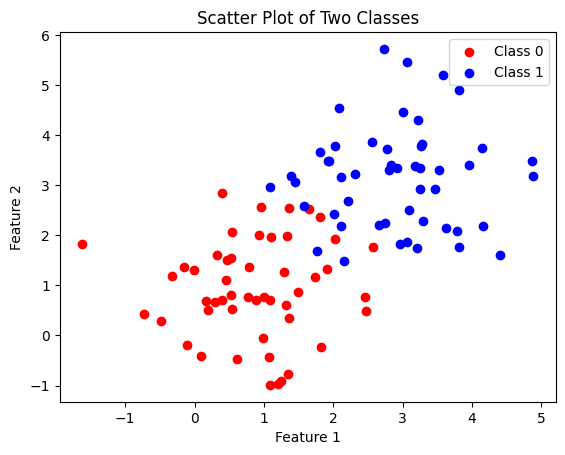

In [3]:

# TODO: Scatter plot the two classes
# Hint: Use plt.scatter


plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Two Classes')
plt.legend()
plt.show()



## 3. Sigmoid Function

Logistic Regression uses the **sigmoid** function:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

This maps any real number to (0,1).


In [4]:

def sigmoid(z):
    # TODO: Implement sigmoid
    return 1 / (1 + np.exp(-z))




## 4. Model Prediction

The logistic regression model is:

\[
z = Xw + b
\]
\[
\hat{y} = \sigma(z)
\]

where:
- `w` → weight vector
- `b` → bias


In [5]:

def predict_proba(X, w, b):
    # TODO: Compute z and apply sigmoid
    # Hint : Use @ (search for it if you don't know)
    z=np.dot(X,w)+b
    return sigmoid(z)


## 5. The Log Likelihood ( This is what we want to optimze)

\[
L = -\frac{1}{n} \sum [y \log(\hat y) + (1-y) \log(1-\hat y)]
\]


In [6]:

def compute_loss(y, y_hat):
    # TODO: Implement
    # Hint: use np.mean and np.log
    return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))


## 6. Gradients

We compute gradients w.r.t. parameters:

\[
dw = \frac{1}{n} X^T(\hat y - y)
\]
\[
db = \frac{1}{n} \sum (\hat y - y)
\]


In [7]:

def compute_gradients(X, y, y_hat):
    # TODO: Compute dw and db
    # Hint:
    # Use the above formulas
    dw = (np.dot((X.T),(y_hat-y)))/X.shape[0]
    db= np.mean(y_hat - y)
    return dw, db



## 7. Training Loop (Gradient Descent)

We now train the model using gradient descent.


In [8]:

# Initialize parameters
w = np.zeros(X.shape[1])
b = 0.0

learning_rate = 0.1
epochs = 1000

losses = []

for epoch in range(epochs):
    # TODO: Forward pass
    y_hat = predict_proba(X, w, b)

    
    # TODO: Compute loss
    loss = compute_loss(y, y_hat)
    print(loss)
    # TODO: Compute gradients
    dw, db = compute_gradients(X, y, y_hat)
    print(dw, db)             
    # TODO: Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
                
    if epoch % 100 == 0:
        losses.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


0.6931471805599453
[-0.51005569 -0.55301986] 0.0
Epoch 0, Loss: 0.6931
0.6441789248412628
[-0.37462887 -0.40331334] 0.05173153635772385
0.6173454097466875
[-0.28215838 -0.30119638] 0.086950659041544
0.6014177861481279
[-0.21873698 -0.23124161] 0.11098730280349818
0.591024086427654
[-0.17421354 -0.18217871] 0.1276849513496217
0.5835691484424218
[-0.14215801 -0.14687862] 0.1394898725885586
0.5777466348295061
[-0.11855908 -0.1209017 ] 0.14794261025904398
0.5728691112837427
[-0.10086138 -0.10142429] 0.15403509470317897
0.5685602603813465
[-0.08738721 -0.0865952 ] 0.1584255189149596
0.5646071462088947
[-0.07700121 -0.07516308] 0.1615638126482517
0.5608859483937629
[-0.06891356 -0.06625829] 0.16376588638033926
0.5573230218904309
[-0.06256144 -0.0592616 ] 0.16525874869475932
0.5538737213405396
[-0.05753547 -0.05372288] 0.1662087606080064
0.5505105256627801
[-0.05353271 -0.0493092 ] 0.16673986351978454
0.5472162047556427
[-0.05032568 -0.04577065] 0.16694567200374433
0.5439798026541368
[-0.0477


## 8. Plot Training Loss


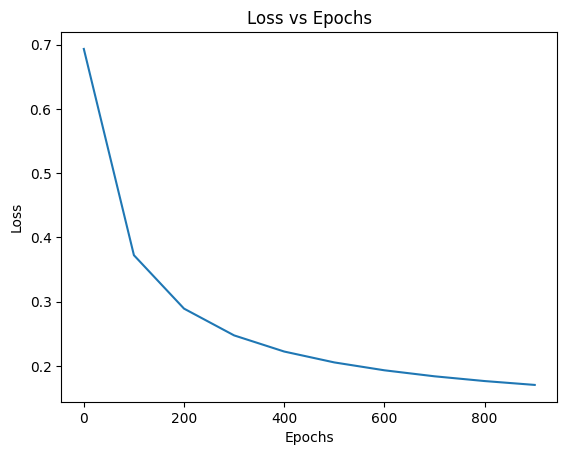

In [9]:

# TODO: Plot loss vs epochs
# Hint: plt.plot(losses)
plt.plot(range(0, epochs, 100), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()  



## 9. Make Predictions

Convert probabilities to class labels.


In [10]:

def predict(X, w, b, threshold=0.5):
    # TODO: Return 0/1 predictions
    # Hint: predict_proba(...) >= threshold
    y_hat = predict_proba(X, w, b)
    return (y_hat >= threshold).astype(int)



## 10. Evaluate Accuracy


In [11]:

# TODO: Compute accuracy
# Hint: np.mean(y_pred == y)
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")  



Training Accuracy: 93.00%



## 11. Decision Boundary Visualization

This is optional but highly recommended.


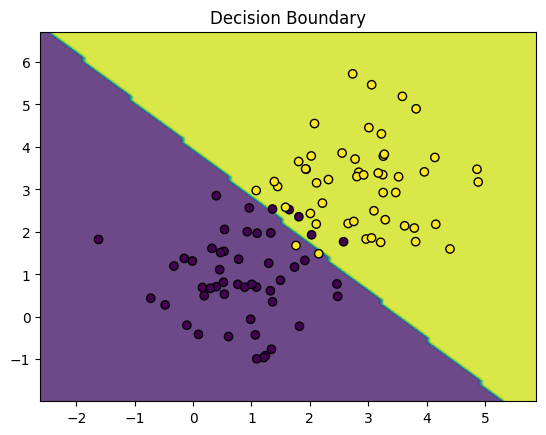

In [12]:

# OPTIONAL:
# Create a meshgrid and plot decision boundary
pltdelta = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, pltdelta),
                         np.arange(y_min, y_max, pltdelta))
Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Boundary')
plt.show()  
